In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Iris dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, names=column_names)

# Convert to binary classification (Setosa vs Non-Setosa for clearer visualization)
data['species'] = data['species'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

# Extract features and target
X = data.drop('species', axis=1).values
y = data['species'].values

In [3]:
# Standardize features (important for perceptron)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate perceptron
def train_perceptron(fit_intercept, X_train, y_train, X_test, y_test):
    model = Perceptron(fit_intercept=fit_intercept, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nPerceptron {'with' if fit_intercept else 'without'} bias:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Train models
model_no_bias = train_perceptron(False, X_train, y_train, X_test, y_test)
model_with_bias = train_perceptron(True, X_train, y_train, X_test, y_test)


Perceptron without bias:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Perceptron with bias:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



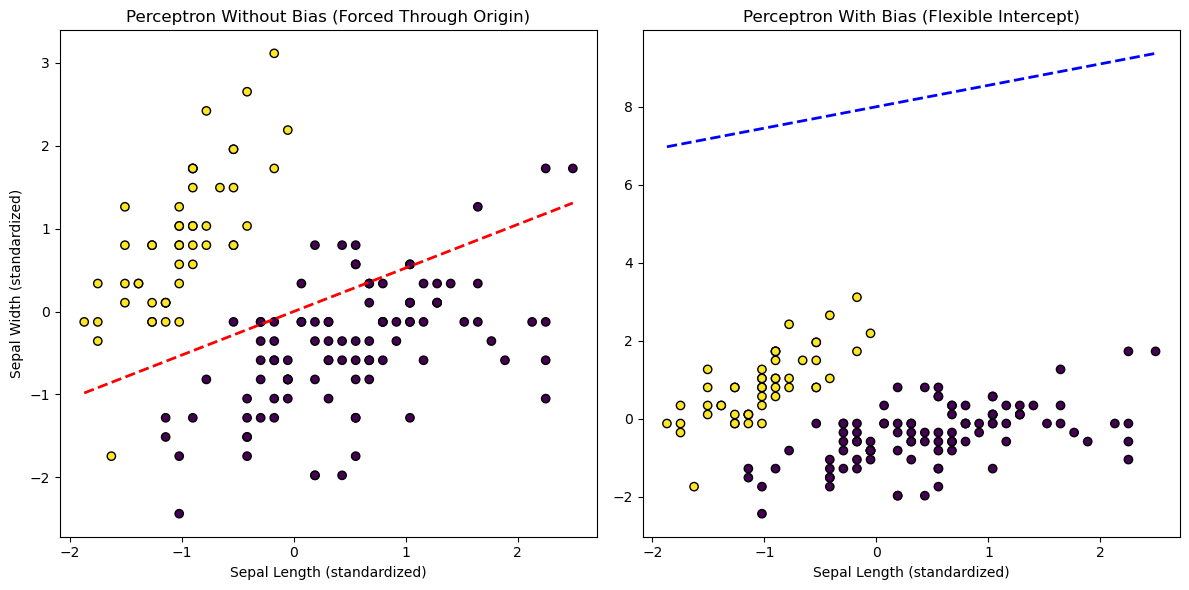

In [4]:
# Visualization (using first two features for 2D plot)
plt.figure(figsize=(12, 6))

# Plot decision boundary without bias
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
y_vals = (-1/model_no_bias.coef_[0][1]) * (model_no_bias.coef_[0][0] * x_vals)
plt.plot(x_vals, y_vals, '--r', linewidth=2)
plt.title("Perceptron Without Bias (Forced Through Origin)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")

# Plot decision boundary with bias
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
y_vals = (-1/model_with_bias.coef_[0][1]) * (model_with_bias.coef_[0][0] * x_vals + model_with_bias.intercept_)
plt.plot(x_vals, y_vals, '--b', linewidth=2)
plt.title("Perceptron With Bias (Flexible Intercept)")
plt.xlabel("Sepal Length (standardized)")

plt.tight_layout()
plt.show()